# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [47]:
import pandas as pd
import numpy as np

train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [48]:
Xtrain = train.drop(['selling_price'], axis=1)
ytrain = train['selling_price']

Xtest = test.drop(['selling_price'], axis=1)
ytest = test['selling_price']

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [49]:
Xtrain = Xtrain[~ytrain.isna()]
ytrain = ytrain[~ytrain.isna()]

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [50]:
Xtrain['mileage'] = Xtrain['mileage'].str.extract(r'([\d.]+)').astype(float)
Xtrain['engine'] = Xtrain['engine'].str.extract(r'([\d.]+)').astype(float)
Xtrain['max_power'] = Xtrain['max_power'].str.extract(r'([\d.]+)').astype(float)

Xtest['mileage'] = Xtest['mileage'].str.extract(r'([\d.]+)').astype(float)
Xtest['engine'] = Xtest['engine'].str.extract(r'([\d.]+)').astype(float)
Xtest['max_power'] = Xtest['max_power'].str.extract(r'([\d.]+)').astype(float)

Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [51]:
features = ['year', 'km_driven', 'seats', 'mileage', 'engine', 'max_power']

Xtrain = Xtrain[features]
Xtest = Xtest[features]

Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [60]:
for feature in features:
    mean = Xtrain[feature].mean()
    
    Xtrain[feature].fillna(mean, inplace=True)
    Xtest[feature].fillna(mean, inplace=True)    

Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

lr = LinearRegression()
rf = RandomForestRegressor()

lr.fit(Xtrain, ytrain)
rf.fit(Xtrain, ytrain)

lr_pred = lr.predict(Xtest)
rf_pred = rf.predict(Xtest)

print("lr score:", r2_score(ytest, lr_pred))
print("rf score:", r2_score(ytest, rf_pred))

lr score: 0.6485839251280123
rf score: 0.9632125862367423


Какая модель получилась лучше?

In [ ]:
# Лучше справился случайный лес

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [68]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(50, 201, 50), 'max_depth': range(10, 51, 10)}
rf = RandomForestRegressor()
gs = GridSearchCV(rf, parameters, scoring='r2', cv=3)
gs.fit(Xtrain, ytrain)
n_estimators = gs.best_params_['n_estimators']
max_depth = gs.best_params_['max_depth']

In [72]:
n_estimators, max_depth

(50, 20)

In [74]:
parameters = {'max_features': range(1, 6, 2), 
              'min_samples_leaf': range(1, 20, 5),
              'min_samples_split': range(2, 20, 5)}

rf = RandomForestRegressor(n_estimators=n_estimators,
                          max_depth=max_depth)

gs = GridSearchCV(rf, parameters, scoring='r2', cv=3)
gs.fit(Xtrain, ytrain)

max_features = gs.best_params_['max_features']
min_samples_leaf = gs.best_params_['min_samples_leaf']
min_samples_split = gs.best_params_['min_samples_split']

In [75]:
max_features, min_samples_leaf, min_samples_split

(5, 1, 2)

Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [76]:
rf = RandomForestRegressor(n_estimators=n_estimators,
                          max_depth=max_depth,
                          max_features=max_features,
                          min_samples_leaf=min_samples_leaf,
                          min_samples_split=min_samples_split)

rf.fit(Xtrain, ytrain)
pred = rf.predict(Xtest)
print('score:', r2_score(ytest, pred))

score: 0.9663487316164291


Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

<BarContainer object of 6 artists>

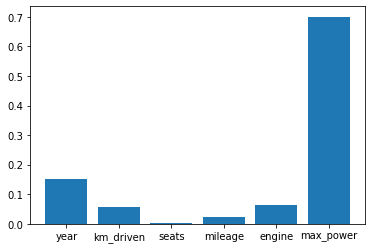

In [80]:
import matplotlib.pyplot as plt

plt.bar(Xtrain.columns, abs(rf.feature_importances_))